In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
file_path = r'C:\Users\User\Desktop\Project 1\nsw_road_crash_data_2018-2022_crash__1_.csv'
df = pd.read_csv(file_path)


In [19]:
df['Speed limit'] = df['Speed limit'].str.extract('(\d+)').astype(float)

df['Speed limit'].fillna(df['Speed limit'].median(), inplace=True)

df['Speed limit'] = df['Speed limit'].astype(int)


In [20]:
speed_limits = df['Speed limit']

def categorize_speed_limit(speed):
    if speed <= 50:
        return 50
    elif speed <= 60:
        return 60
    elif speed <= 70:
        return 70
    elif speed <= 80:
        return 80
    elif speed <= 90:
        return 90
    elif speed <= 100:
        return 100
    else:
        return 110

df['Speed Limit Category'] = speed_limits.apply(categorize_speed_limit)


In [21]:
speed_limit_groups = df.groupby('Speed Limit Category').size()

degree_of_crash_groups = df[df['Degree of crash'].notnull()].groupby('Speed Limit Category')['Degree of crash'].value_counts()


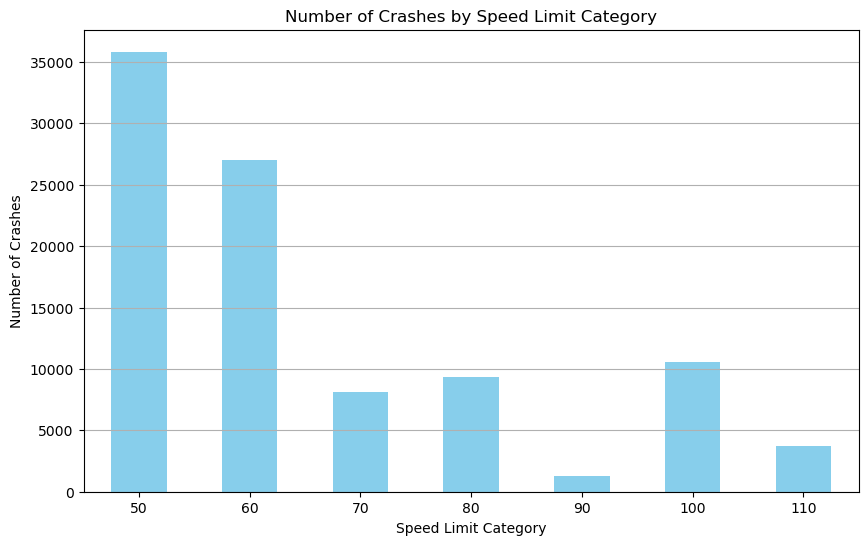

<Figure size 1000x600 with 0 Axes>

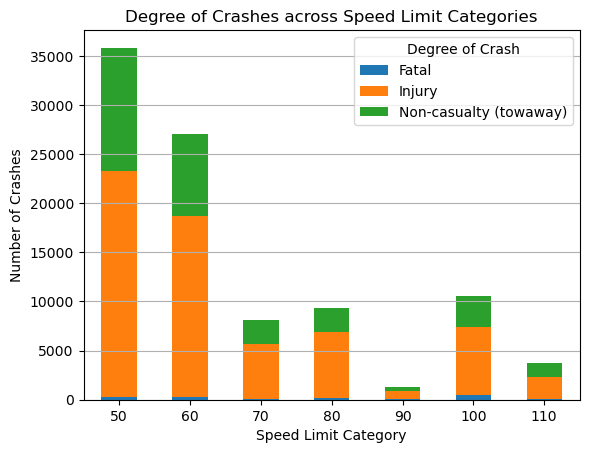

<Figure size 1000x600 with 0 Axes>

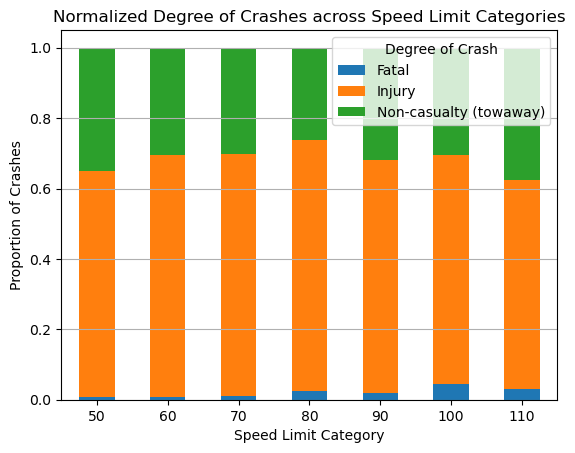

In [22]:
plt.figure(figsize=(10, 6))
speed_limit_groups.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Speed Limit Category')
plt.xlabel('Speed Limit Category')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
degree_of_crash_groups.unstack().plot(kind='bar', stacked=True)
plt.title('Degree of Crashes across Speed Limit Categories')
plt.xlabel('Speed Limit Category')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.legend(title='Degree of Crash', loc='upper right')
plt.grid(axis='y')
plt.show()

degree_of_crash_groups_normalized = degree_of_crash_groups.unstack().apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(10, 6))
degree_of_crash_groups_normalized.plot(kind='bar', stacked=True)
plt.title('Normalized Degree of Crashes across Speed Limit Categories')
plt.xlabel('Speed Limit Category')
plt.ylabel('Proportion of Crashes')
plt.xticks(rotation=0)
plt.legend(title='Degree of Crash', loc='upper right')
plt.grid(axis='y')
plt.show()
